# Initialization

In [1]:
# Autogenerated on 15:52:58 2016/01/25
# Regen Command:
#    /home/zach/envs/thesis/ibeis/ibeis/__main__.py --tf autogen_ipynb --db humpbacks --ipynb -t default:proot=BC_DTW -a default:has_any=hasnotch
#
# Matplotlib stuff
import matplotlib as mpl
%matplotlib inline
%load_ext autoreload
%autoreload

# Set global utool flags
import utool as ut
ut.util_io.__PRINT_WRITES__ = False
ut.util_io.__PRINT_READS__ = False
ut.util_parallel.__FORCE_SERIAL__ = True
ut.util_cache.VERBOSE_CACHE = False
ut.NOT_QUIET = False

import plottool as pt
fix_figsize = ut.partial(pt.set_figsize, w=30, h=10, dpi=256)

draw_case_kw = dict(show_in_notebook=True, annot_modes=[0, 1], viz_score_name=True)

# Setup database specific parameter configurations
db = 'humpbacks_fb'

# Pick one of the following annotation configurations
# to choose the query and database annotations
a = [
    #'default:has_any=hasnotch,mingt=2',
    'default:has_any=hasnotch,mingt=2',
    #'default:qmingt=2',
    #'default:has_any=hasnotch,mingt=2,size=50',
    # See ibeis/expt/annotation_configs.py for names of annot configuration options
    #'default:has_any=(query,),dpername=1,exclude_reference=True',
    #'default:is_known=True',
    #'default:qsame_imageset=True,been_adjusted=True,excluderef=True'
    #'default:qsame_imageset=True,been_adjusted=True,excluderef=True,qsize=10,dsize=20',
    #'default:require_timestamp=True,min_timedelta=3600',
    #'default:species=primary',
    #'timectrl:',
    #'timectrl:been_adjusted=True,dpername=3',
    #'timectrl:qsize=10,dsize=20',
    #'unctrl:been_adjusted=True',
]

# Set to override any special configs
qaid_override = None
daid_override = None

# Uncomment one or more of the following pipeline configurations to choose
# how the algorithm will run.  If multiple configurations are chosen, they
# will be compared in the histograms, but only the first configuration will
# be used for inspecting results.
#crop_dim_sizes = [(500,50), (500,500)]
t = [
    #'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,\
    #te_score_weight=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]',
    #'default:proot=BC_DTW',
    'default:proot=BC_DTW,manual_extract=[True,False],ignore_notch=True',
    #'default:proot=vsmany',
    #'default:proot=BC_DTW,decision=[max,average],crop_dim_size=1000,crop_enabled=True,manual_extract=True,\
    #use_te_scorer=True,ignore_notch=False',
    #'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,\
    #use_te_scorer=False,ignore_notch=True,te_score_weight=0.5',
    #'default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=True'
    #for sz, w in crop_dim_sizes # this will take a while
    #'default:proot=vsmany',
    #'default',
    #'default:K=1',
    #'default:K=1,AI=False',
    #'default:K=1,AI=False,QRH=True',
    #'default:K=1,RI=True,AI=False',
    #'default:K=1,adapteq=True',
    #'default:fg_on=[True,False]',
    
]


# Load database for this test run

#ibeis.expt.experiment_harness.USE_BIG_TEST_CACHE = False
import ibeis

ibs = ibeis.opendb(db=db)
#ibs.depc.clear_all()

# Make notebook cells wider
from IPython.core.display import HTML
HTML("<style>body .container { width:99% !important; }</style>")

[!plotttool] WARNING guitool does not have __PYQT__
Trying /home/zach/envs/thesis/local/lib/python2.7/site-packages/flann-1.8.4-py2.7.egg/pyflann/lib/libflann.so

+------


/home/zach/envs/thesis/local/lib/python2.7/site-packages/matplotlib/__init__.py:1350: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)


<!!! WARNING !!!>
[!controller_inject] Missing flask.ext.cas.
To install try pip install git+https://github.com/cameronbwhite/Flask-CAS.git
<type 'exceptions.ImportError'>: No module named flask.ext.cas
</!!! WARNING !!!>

L______



+------

<!!! WARNING !!!>
[!custom_layers] WARNING: GPU seems unavailable
<type 'exceptions.ImportError'>: No module named pylearn2.sandbox.cuda_convnet.filter_acts
</!!! WARNING !!!>

L______


[ibs.__init__] new IBEISController
[ibs._init_dirs] ibs.dbdir = '/media/hdd/zach/data/IBEIS/humpbacks_fb'
[depc] Initialize ANNOTATIONS depcache
[ibs.__init__] END new IBEISController




/home/zach/envs/thesis/local/lib/python2.7/site-packages/Theano-0.8.0.dev0-py2.7.egg/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


# Humpback Select

In [2]:
# Tag annotations which have been given manual notch points
from ibeis_flukematch.plugin import *  # NOQA
ibs = ibeis.opendb(defaultdb=db)
all_aids = ibs.get_valid_aids()
isvalid = ibs.depc.get_property('Has_Notch', all_aids, 'flag')
aid_list = ut.compress(all_aids, isvalid)
# Tag the appropriate annots
ibs.append_annot_case_tags(aid_list, ['hasnotch'] * len(aid_list))
#depc = ibs.depc
#qaid_override = aid_list[0:5]
#daid_override = aid_list[0:7]
#print(qaid_override)
#print(daid_override)

# Pipeline Config Info

In [3]:
cfgdict_list, pipecfg_list = ibeis.expt.experiment_helpers.get_pipecfg_list(
    test_cfg_name_list=t, ibs=ibs)
ibeis.expt.experiment_helpers.print_pipe_configs(cfgdict_list, pipecfg_list)

+--- 0 / 2 ===
default:manual_extract=True
BC_DTW(decision=max,weight_import=1,window=10,version=8)_NotchTip(manual_extract=True,version=4,kp_net=128_decoupled)_CropChip(crop_enabled=True,version=2,ext=.png)_TrailingEdge(n_nb3,ign_nTrue,version=9,te_sTrue,w_tes0.5,te_net=annot_res,te_smavg,tol=None)_BlockCurv(csize_max=8,csize_min=2,csize_step=2,version=2)
L___
+--- 1 / 2 ===
default:manual_extract=False
BC_DTW(decision=max,weight_import=1,window=10,version=8)_NotchTip(version=4,kp_net=128_decoupled)_CropChip(crop_enabled=True,version=2,ext=.png)_TrailingEdge(n_nb3,ign_nTrue,version=9,te_sTrue,w_tes0.5,te_net=annot_res,te_smavg,tol=None)_BlockCurv(csize_max=8,csize_min=2,csize_step=2,version=2)
L___


# Annotation Config Info

In [4]:
acfg_list, expanded_aids_list = ibeis.expt.experiment_helpers.get_annotcfg_list(
    ibs, acfg_name_list=a, qaid_override=qaid_override, daid_override=daid_override, filter_dups=False)
ibeis.expt.annotation_configs.print_acfg_list(acfg_list, expanded_aids_list, ibs, per_qual=True)

+=== <Info acfg_list> ===
non-varied aidcfg = {
    'common': {
        '_cfgindex': 0,
        '_cfgname': 'default',
        '_cfgstr': 'default:has_any=hasnotch,mingt=2',
        'hackerrors': True,
        'has_any': 'hasnotch',
        'min_pername': 2,
        'sample_rule': 'random',
        'sample_rule_ref': 'random',
        'sample_size': 942,
        'shuffle': False,
        'view_ext': 0,
    },
    'dcfg': {
        '_cfgtype': 'dcfg',
    },
    'qcfg': {
        '_cfgtype': 'qcfg',
    },
}
+--- acfg 1 / 1 -- q_cfgname=default d_cfgname=default ---- 
acfg = {}
annot_config_stats = {
    'dbname': humpbacks_fb,
    'num_qaids': 942,
    'num_daids': 942,
    'num_annot_intersect': 942,
    'qaid_stats': {
        'num_qaids': 942,
        'qhashid': _QSUUIDS((942)slrtibxcfzamrorv),
        'qper_name': {max: 6, min: 2, mean: 2.25, std: 0.63, nMin: 346, nMax: 3, shape: (419,), med: 2},
        'qper_qual': {UNKNOWN: 942},
        'qper_vp': {None: 942},
        'qenc_per

/home/zach/envs/thesis/local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:227: RuntimeWarning: All-NaN axis encountered
  warnings.warn("All-NaN axis encountered", RuntimeWarning)
/home/zach/envs/thesis/local/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:326: RuntimeWarning: All-NaN slice encountered
  warnings.warn("All-NaN slice encountered", RuntimeWarning)


# Timestamp Distribution

[main_helpers] testdata_expanded_aids


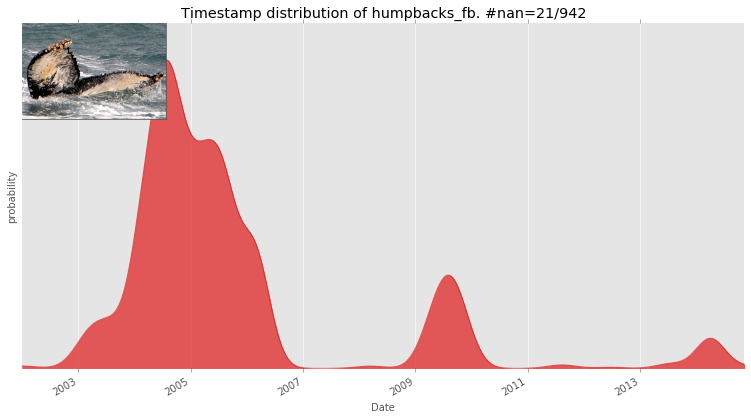

In [5]:
# Get images of those used in the tests
ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
aids = ut.unique(ut.flatten([qaids, daids]))
gids = ut.unique(ibs.get_annot_gids(aids))
# Or just get time delta of all images
#gids = ibs.get_valid_gids()

ibeis.other.dbinfo.show_image_time_distributions(ibs, gids)
#ibeis.other.dbinfo.show_image_time_distributions(ibs, gids)

# Example Annotations / Detections

# Example Name Graph

In [6]:
#from ibeis.viz import viz_graph
#ibs, qaids, daids = ibeis.testdata_expanded_aids(a=a[0], ibs=ibs)
#aids = ut.unique_keep_order(ut.flatten([qaids, daids]))
# Sample some annotations
#aids = ibs.sample_annots_general(aids, filter_kw=dict(sample_size=20, min_pername=2), verbose=False)
# Visualize name graph
#namegraph = viz_graph.make_name_graph_interaction(ibs, aids=aids, zoom=.4)
#fix_figsize()

# Query Accuracy (% correct annotations)

In [7]:
testres = ibeis.run_experiment(
    e='rank_cdf',
    db=db, a=a, t=t, qaid_override=qaid_override, daid_override=daid_override)
#testres.print_unique_annot_config_stats()
_ = testres.draw_func(draw_icon=False)
fix_figsize()

Equivalent Command Line:
ibeis -e rank_cdf --db humpbacks_fb -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,manual_extract=[True,False],ignore_notch=True --show
testnameid="humpbacks_fb ['default:proot=BC_DTW,manual_extract=[True,False],ignore_notch=True']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((942)yrnvjbyxvlmujpgn)_DVUUIDS((942)yrnvjbyxvlmujpgn)
pipe_cfgstr= BC_DTW(decision=max,weight_import=1,window=10,version=8)_NotchTip(manual_extract=True,version=4,kp_net=128_decoupled)_CropChip(crop_enabled=True,version=2,ext=.png)_TrailingEdge(n_nb3,ign_nTrue,version=9,te_sTrue,w_tes0.5,te_net=annot_res,te_smavg,tol=None)_BlockCurv(csize_max=8,csize_min=2,csize_step=2,version=2)
pipe_hashstr = vylwleptptnumzoi
[humpbacks_fb cfg 0/2][req] Executing request <BC_DTW_Request(humpbacks_fb) nQ=942, nD=942, nP=886422 vylwleptptnumzoi>
[humpbacks_fb cfg 0/2]Reporting SQLite Error
[humpbacks_fb cfg 0/2]params = (
[humpbacks_fb cfg 0/2]    2659267,
[humpbacks_fb cfg 0/2]

OperationalError: database is locked

# Query Accuracy (% correct names)

# Result Timedelta Distribution

In [ ]:
test_result = ibeis.run_experiment(
    e='timedelta_hist',
    db=db,
    a=a[0:1],
    t=t[0:1],
    qaid_override=qaid_override, daid_override=daid_override,
    truepos=True)
test_result.draw_func()
fix_figsize()

# Configuration Overlap

In [ ]:
# How well do different configurations compliment each other?
testres.print_config_overlap()

# All Score Distribution

In [ ]:
testres = ibeis.run_experiment(
    e='scores',
    db=db, a=a[0:1], t=t[0:1],
    qaid_override=qaid_override, daid_override=daid_override,
    f=[':fail=None,min_gf_timedelta=None'],
    verbose=True
)
_ = testres.draw_func()
fix_figsize()
testres.draw_taghist()()
fix_figsize()

# Scores of Success Cases

Equivalent Command Line:
ibeis -e draw_annot_scoresep --db humpbacks_fb -a default:has_any=hasnotch,mingt=2 -t default:proot=BC_DTW,manual_extract=[True,False],ignore_notch=True -f :fail=False,min_gf_timedelta=None --show
testnameid="humpbacks_fb ['default:proot=BC_DTW,manual_extract=[True,False],ignore_notch=True']['default:has_any=hasnotch,mingt=2']"
annot_cfgstr = QVUUIDS((942)yrnvjbyxvlmujpgn)_DVUUIDS((942)yrnvjbyxvlmujpgn)
pipe_cfgstr= BC_DTW(decision=max,weight_import=1,window=10,version=8)_NotchTip(manual_extract=True,version=4,kp_net=128_decoupled)_CropChip(crop_enabled=True,version=2,ext=.png)_TrailingEdge(n_nb3,ign_nTrue,version=9,te_sTrue,w_tes0.5,te_net=annot_res,te_smavg,tol=None)_BlockCurv(csize_max=8,csize_min=2,csize_step=2,version=2)
pipe_hashstr = vylwleptptnumzoi
[humpbacks_fb cfg 0/2][req] Executing request <BC_DTW_Request(humpbacks_fb) nQ=942, nD=942, nP=886422 vylwleptptnumzoi>
[humpbacks_fb cfg 0/2]Converting results
testnameid="humpbacks_fb ['default:proot=BC_DT

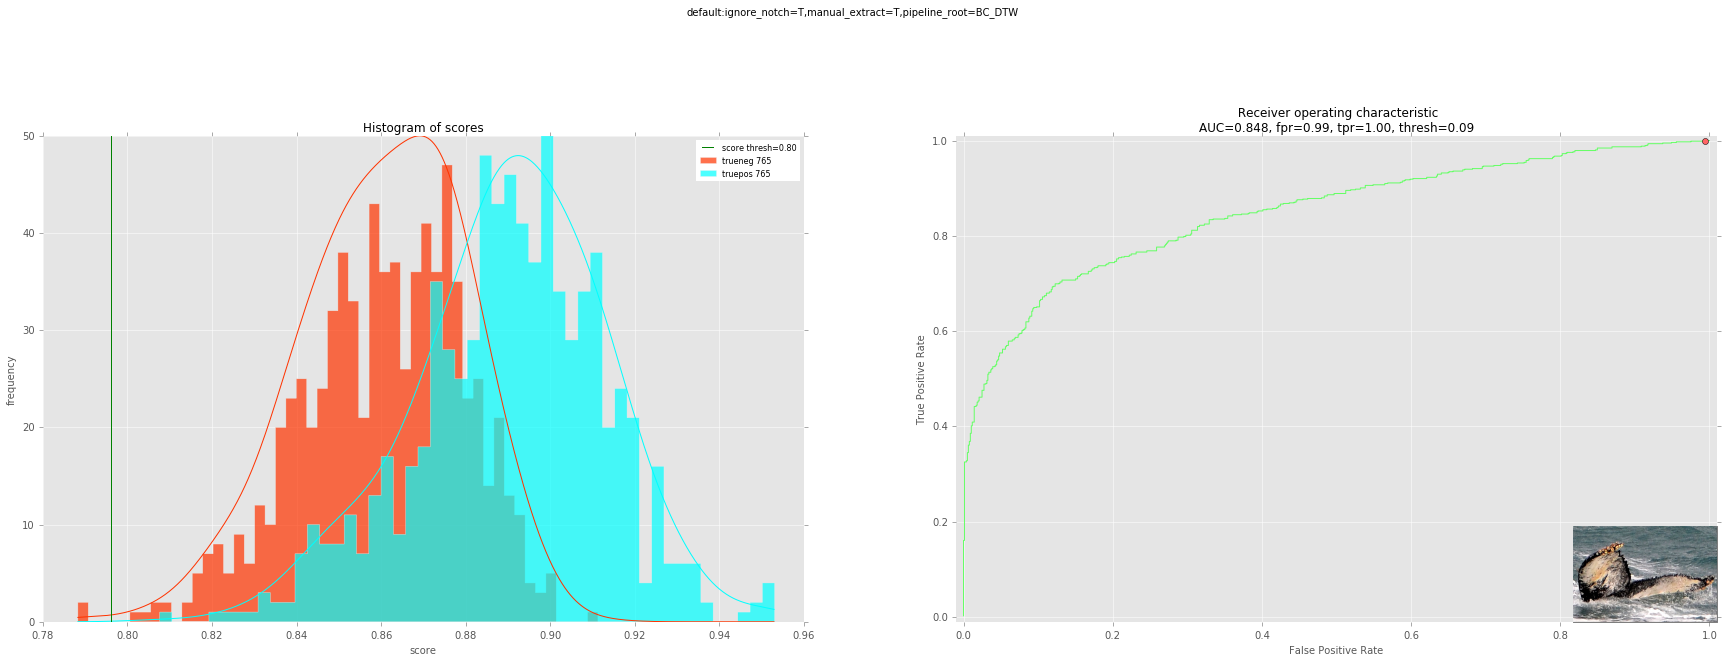

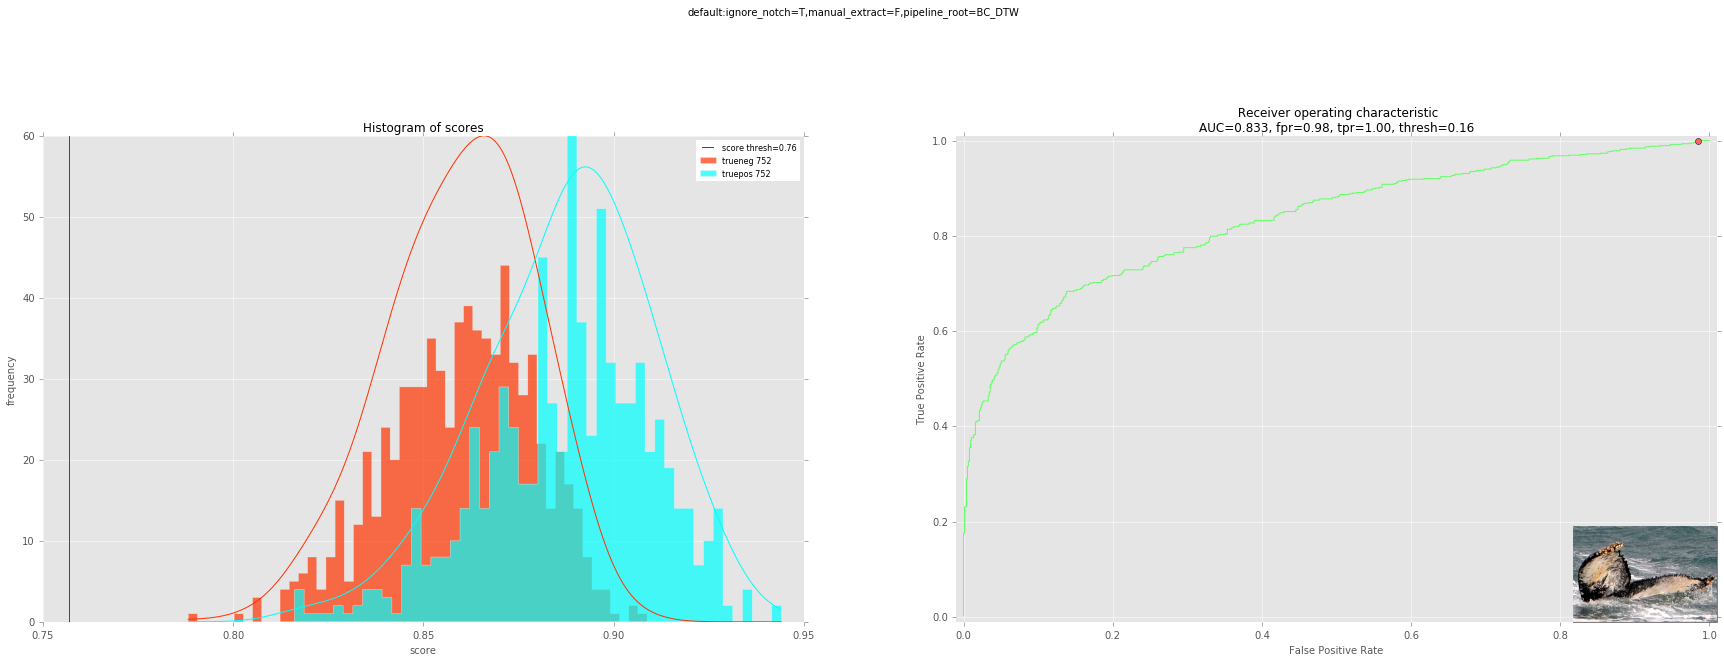

In [11]:
testres = ibeis.run_experiment(
    e='draw_annot_scoresep',
    db=db, a=a[0:1], t=t[0:1],
    f=[':fail=False,min_gf_timedelta=None'],
)
_ = testres.draw_func()
fix_figsize()

# Cases: Top Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t,
    f=[':fail=False,index=3:6,sortdsc=gtscore,max_pername=2,allcfg=True'],
    figsize=(30, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Cases: Challenging Success Cases

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a, t=t,
    f=[':fail=False,index=0:3,sortasc=gtscore,max_pername=2,allcfg=True'],
    figsize=(30, 8),
    **draw_case_kw)

_ = testres.draw_func()

# Cases: Failure (false pos)

In [ ]:
testres = ibeis.run_experiment(
e='draw_cases',
db=db, a=a[0:1], t=t,
f=[':fail=True,index=0:3,max_pername=2,require_all_cfg=True,allcfg=True,sortdsc=gfscore'],
figsize=(30, 8),
**draw_case_kw)
_ = testres.draw_func()

# Cases: Failure (false neg)

In [ ]:
testres = ibeis.run_experiment(
    e='draw_cases',
    db=db, a=a[0:1], t=t,
    f=[':fail=True,index=6:10,max_pername=2,require_all_cfg=True'],
    figsize=(30, 8),
    **draw_case_kw)
_ = testres.draw_func()

# Disagreements

In [ ]:
# This shows individual examples where the tested configurations disagree.
# This only works if more than one configuration was specified.
testres = ibeis.run_experiment(
     e='draw_cases',
     db=db, a=a, t=t,
     f=[':disagree=True,index=0:8,min_gtscore=0.0001,require_all_cfg=True'],
     figsize=(30, 8),
     **draw_case_kw)

In [ ]:

filt_cfg = {'fail': True, 'min_gtrank': 1, 'max_gtrank': None, 'min_gf_timedelta': '24h'}
ibs, testres = ibeis.testdata_expts('humpbacks_fb', a=['default:has_any=hasnotch,mingt=2'], 
    t=['default:proot=BC_DTW,decision=max,crop_dim_size=500,crop_enabled=True,manual_extract=False,use_te_scorer=True,ignore_notch=True,te_net=annot_simple', 'default:proot=vsmany'])
filt_cfg = ':disagree=True,min_gtscore=.00001'
#filt_cfg = cfghelpers.parse_argv_cfg('--filt')[0]
case_pos_list = testres.case_sample2(filt_cfg)

In [ ]:
print(case_pos_list)

In [1]:
# DISABLE_DOCTEST
from ibeis_flukematch.plugin import *  # NOQA
ibs = ibeis.opendb(defaultdb='humpbacks_fb')
all_aids = ibs.get_valid_aids()
aids_used = ibs.filter_annots_general(all_aids, filter_kw={'mingt':2})
isvalid = ibs.depc.get_property('Has_Notch', aids_used, 'flag')
aid_list = ut.compress(aids_used, isvalid)
#print('aid_list = %r' % (aid_list,))
depc = ibs.depc
config = {'n_neighbors': 5, 'crop_enabled': True, 'crop_dim_size':750, 'ignore_notch':False, 'use_te_scorer':False,
          'te_score_weight':0.5,'te_net':'annot_res', 'manual_extract':True, 'te_score_method':'avg', 'tol':50, 'sizes':list(range(1,101))}

teid_list = ibs.depc.get_rowids('Trailing_Edge', aid_list, config)
propgen = preproc_block_curvature(depc, teid_list, config)
curvatures = list(propgen)
#print('tedge_list = %r' % (tedge_list,))
#print('cost_list = %r' % (cost_list,))
#ut.quit_if_noshow()
# Visualize
#aid_list = [2826]
#chipcfg = ibeis.algo.preproc.preproc_chip.ChipConfig(dim_size=None)
chips = depc.get_property('Cropped_Chips', aid_list, 'img', config=config, _debug=True)
notches = depc.get_property('Cropped_Chips', aid_list, ('notch', 'left', 'right'), config=config, _debug=True)
tedge_list = depc.get_property('Trailing_Edge', aid_list, ('edge'), config=config)
overlay_chips = [overlay_fluke_feats(np.copy(chip), path, tips=tips) for chip, path, tips in zip(chips, tedge_list, notches)]

#print([i.shape[0] for i in tedge_list])




+------

<!!! WARNING !!!>
[!controller_inject] Missing flask.ext.cas.
To install try pip install git+https://github.com/cameronbwhite/Flask-CAS.git
<type 'exceptions.ImportError'>: No module named flask.ext.cas
</!!! WARNING !!!>

L______


Trying /home/zach/envs/thesis/local/lib/python2.7/site-packages/flann-1.8.4-py2.7.egg/pyflann/lib/libflann.so
Couldn't import dot_parser, loading of dot files will not be possible.

+------

<!!! WARNING !!!>
[!custom_layers] WARNING: GPU seems unavailable
<type 'exceptions.ImportError'>: No module named pylearn2.sandbox.cuda_convnet.filter_acts
</!!! WARNING !!!>

L______


[ibs.__init__] new IBEISController
[ibs._init_dirs] ibs.dbdir = '/media/hdd/zach/data/IBEIS/humpbacks_fb'
[depc] Initialize ANNOTATIONS depcache
[util_io] * load_cPkl(u'.../humpbacks_fb/general_config.cPkl')
[ibs.__init__] END new IBEISController


+------

<!!! WARNING !!!>
[!filter_annots_general] [!?] Caught exception
<type 'exceptions.AssertionError'>: unknown_keys=set(['m

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled)
/home/zach/envs/thesis/local/lib/python2.7/site-packages/Theano-0.8.0.dev0-py2.7.egg/theano/tensor/signal/downsample.py:5: UserWarning: downsample module has been moved to the pool module.
  warnings.warn("downsample module has been moved to the pool module.")


In [3]:
curvatures_mat = np.stack([i[0] for i in filter(lambda x: x is not None, curvatures)],axis=0)
avg_curv_std = np.average(np.std(curvatures_mat,axis=0),axis=0)

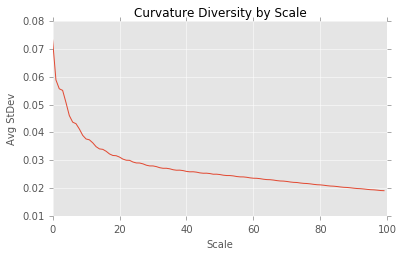

In [49]:
import plottool as pt
import random
import matplotlib.pyplot as plt
%matplotlib inline
pt.plot(avg_curv_std)
pt.set_title("Curvature Diversity by Scale")
pt.set_xlabel("Scale")
pt.set_ylabel("Avg StDev")
plt.gcf()
plt.savefig("/home/zach/data/results/curvature_diversity_fb.png")

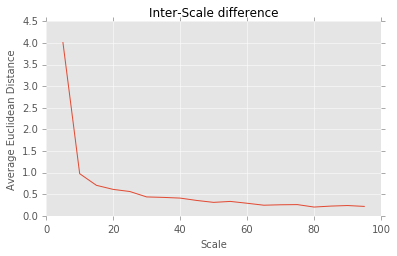

In [50]:
pt.plot(range(5,100,5), np.average(np.linalg.norm(np.diff(curvatures_mat[:,:,::5],axis=2),axis=1),axis=0))
pt.set_title("Inter-Scale difference")
pt.set_ylabel("Average Euclidean Distance")
pt.set_xlabel("Scale")
plt.gcf()
plt.savefig("/home/zach/data/results/interscale_diff_fb.png")

5
(535, 750, 3)


NameError: name 'score_pred_list' is not defined

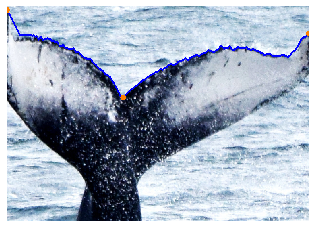

In [17]:

rand_aid = random.choice(aid_list)
#rand_aid = 379
rand_ind = aid_list.index(rand_aid)
rand_ind = 4

pt.gcf().set_size_inches((15,15))
pt.imshow(overlay_chips[rand_ind], pnum=311)
print(aid_list[rand_ind])
print(overlay_chips[rand_ind].shape)
print(score_pred_list[rand_ind].shape)
pt.imshow(cv2.Sobel(cv2.cvtColor(chips[rand_ind], cv2.COLOR_BGR2GRAY), cv2.CV_32F, 0, 1, ksize=5), pnum=313)
dilated = cv2.erode(score_pred_list[rand_ind], np.ones((20,20),dtype=np.float32))
pt.imshow((score_pred_list[rand_ind] < 0.5) * 255, pnum=312)
#pt.imshow((dilated < 0.5) * 255, pnum=313)
#iteract_obj = pt.interact_multi_image.MultiImageInteraction(overlay_chips, nPerPage=4)
#iteract_obj.start()
#pt.show_if_requested()

In [5]:
# DISABLE_DOCTEST                                                                                 
from ibeis_flukematch.plugin import *  # NOQA     
ibs = ibeis.opendb(defaultdb='humpbacks_fb')
all_aids = ibs.get_valid_aids()
aids_list = ibs.filter_annots_general(all_aids, filter_kw={'mingt':2})
#isvalid = ibs.depc.get_property('Has_Notch', aids_used, 'flag')
#aid_list = ut.compress(aids_used, isvalid)       
#config = {'n_neighbors': 5, 'crop_enabled': True, 'crop_dim_size':None, 'ignore_notch':False, 'use_te_scorer':False,
#          'te_score_weight':0.5,'te_net':'annot_res', 'manual_extract':False, 'te_score_method':'avg', 'tol':None,}
config = dict(crop_enabled=True,crop_dim_size=None, dim_size=None)                                                        
cid_list = ibs.depc.get_rowids('chips', aid_list, config)                                         
tipid_list = ibs.depc.get_rowids('Notch_Tips', aid_list, config)                                  
depc = ibs.depc                                                                                   
list(preproc_cropped_chips(depc, cid_list, tipid_list, CropChipConfig(**config)))                                   
#cpid_list = ibs.depc.d.get_Cropped_Chips_rowids(aid_list, config)                                
#cpid_list = ibs.depc.w.Cropped_Chips.get_rowids(aid_list, config)                                
chip_list = ibs.depc.get_property('Cropped_Chips', aid_list, 'img', config)                       
notch_tips = ibs.depc.get_property('Cropped_Chips', aid_list, ('notch', 'left', 'right'), config)                                                                    



+------

<!!! WARNING !!!>
[!filter_annots_general] [!?] Caught exception
<type 'exceptions.AssertionError'>: unknown_keys=set(['mingt'])
</!!! WARNING !!!>

L______

[deptbl.add] Add 2413 / 2423 new props to u'chips'
[deptbl.add]  * config_rowid = 2
[deptbl.add]  * config = <ChipConfig()>
add chips chunk    0/10...  Preprocess Chips
config = <ChipConfig() at 0x7fef98516350>
computing chips    1/2413...  rate=26.44 Hz, etr=0:01:31, ellapsed=0:00:00, wall=19:42 EST
computing chips   26/2413...  rate=17.19 Hz, etr=0:02:18, ellapsed=0:00:01, wall=19:42 EST
computing chips   52/2413...  rate=15.80 Hz, etr=0:02:29, ellapsed=0:00:03, wall=19:42 EST
computing chips   78/2413...  rate=14.94 Hz, etr=0:02:36, ellapsed=0:00:04, wall=19:42 EST
computing chips  104/2413...  rate=11.46 Hz, etr=0:03:21, ellapsed=0:00:07, wall=19:42 EST
computing chips  117/2413...  rate=10.21 Hz, etr=0:03:44, ellapsed=0:00:08, wall=19:42 EST
computing chips  130/2413...  rate=14.02 Hz, etr=0:02:42, ellapsed=0:00:09,

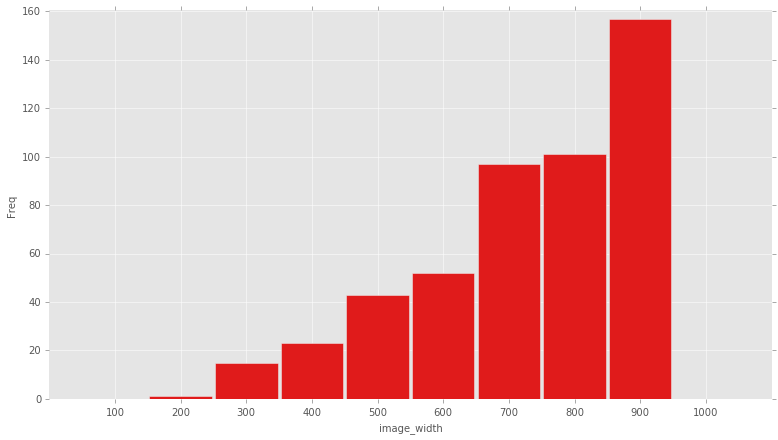

In [6]:
# let's look at the histogram of the trailing edge sizes
import plottool as pt
%matplotlib inline
hist, bin_edges = np.histogram([i.shape[1] for i in chip_list], bins=[100,200,300,400,500,600,700,800,900,1000])
pt.draw_histogram(bin_edges, hist, xlabel='image_width', autolabel=False)

import matplotlib.pyplot as plt
plt.gcf()
plt.savefig("/home/zach/data/results/chip_width_hist_fb.png")

In [ ]:
# problem aids:
# note: 379 snaps to the horizon, which the TE scorer labels some of as TE...
aid_bad_te = [2076, 3370, 379, 3953, 3372]

In [ ]:
#### Images for Slides #####
# Pictures of trailing edge, keypoints for manual vs AI extraction
# Comparison between Hotspotter and BC-DTW
# Success cases, failure cases for each